# Homework 3 - Alexander Ilyin CSE 258

# Read Prediction

In [13]:
import pandas as pd
import numpy
import warnings
import gzip
import random
import matplotlib.pyplot as plt

from collections import defaultdict
from math import sqrt

warnings.filterwarnings("ignore")


def readCSV(path):
    f = gzip.open(path, "rt")
    f.readline()
    for l in f:
        yield l.strip().split(",")


X = []
y = []
data = pd.read_csv("train_Interactions.csv.gz")
for i in range(len(data)):
    X.extend([[data["userID"][i], data["bookID"][i]]])
    y.append(1)

X_train = X[:190000]
y_train = y[:190000]
X_val = X[190000:200000]
y_val = y[190000:200000]

#### Question 1: Create "negative" entries for books that users haven't read

In [14]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)
all_books = set([x[1] for x in X])

for x in X:
    u, i = x[0], x[1]
    usersPerItem[i].add(u)
    itemsPerUser[u].add(i)

for x in range(len(X_val)):
    user = X_val[x][0]
    unread_books = list(all_books.difference(itemsPerUser[user]))
    choice = unread_books[random.randint(0, len(unread_books) - 1)]
    X_val.extend([[X_val[x][0], choice]])
    y_val.append(0)

In [15]:
bookCount = defaultdict(int)
totalRead = 0

for x in range(len(X_train)):
    bookCount[X_train[x][1]] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalRead / 2:
        break

predictions = open("predictions_Read_question1.txt", "w")
for l in range(len(X_val)):
    u = X_val[l][0]
    b = X_val[l][1]
    if b in return1:
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")

predictions.close()

predictions = open("predictions_Read_question1.txt", "r")
predictions_array = []
for l in predictions.readlines():
    predictions_array = numpy.append(predictions_array, l[20])

y_actual = []
y_actual = numpy.append(y_actual, y_val)
correctPredictions = 0

for x in range(len(predictions_array)):
    if numpy.array_equal(predictions_array[x], str(int(y_actual[x]))):
        correctPredictions = correctPredictions + 1

accuracy = correctPredictions / len(predictions_array)
print(f"The accuracy of the baseline model is {accuracy}")

The accuracy of the baseline model is 0.64555


#### Question 2: Improve Baseline Model

In [311]:
bookCount = defaultdict(int)
totalRead = 0

for x in range(len(X)):
    bookCount[X[x][1]] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

threshold_list = []
accuracy_list = []
for threshold in range(0, totalRead, 50000):
    return1 = set()
    count = 0
    for ic, i in mostPopular:
        count += ic
        return1.add(i)
        if count > threshold:
            break

    predictions = open("predictions_Read_question2.txt", "w")
    for l in range(len(X_val)):
        u = X_val[l][0]
        b = X_val[l][1]
        if b in return1:
            predictions.write(u + "-" + b + ",1\n")
        else:
            predictions.write(u + "-" + b + ",0\n")

    predictions.close()

    predictions = open("predictions_Read_question2.txt", "r")
    predictions_array = []
    for l in predictions.readlines():
        l.strip("\n")
        predictions_array = numpy.append(predictions_array, l[20])

    y_actual = []
    y_actual = numpy.append(y_actual, y_val)
    correctPredictions = 0

    for x in range(len(predictions_array)):
        if predictions_array[x] == str(int(y_actual[x])):
            correctPredictions += 1

    threshold_list.append(threshold)
    accuracy = correctPredictions / len(predictions_array)
    accuracy_list.append(accuracy)

Text(0, 0.5, 'Accuracy')

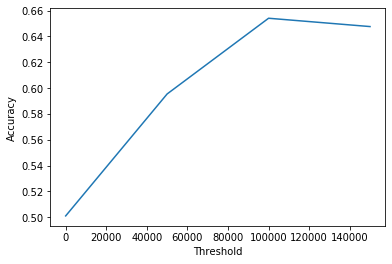

In [312]:
accuracy_threshold = pd.DataFrame(
    list(zip(threshold_list, accuracy_list)), columns=["threshold", "accuracy"]
)
plt.plot("threshold", "accuracy", data=accuracy_threshold)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

In [313]:
accuracy_threshold.loc[accuracy_threshold["accuracy"].idxmax()]

threshold    100000.0000
accuracy          0.6541
Name: 2, dtype: float64

In [316]:
return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > 114500:
        break

predictions = open("predictions_Read_question2.txt", "w")
for l in range(len(X_val)):
    u = X_val[l][0]
    b = X_val[l][1]
    if b in return1:
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")

predictions.close()

predictions = open("predictions_Read_question2.txt", "r")
predictions_array = []
for l in predictions.readlines():
    l.strip("\n")
    predictions_array = numpy.append(predictions_array, l[20])

y_actual = []
y_actual = numpy.append(y_actual, y_val)
correctPredictions = 0

for x in range(len(predictions_array)):
    if predictions_array[x] == str(int(y_actual[x])):
        correctPredictions += 1

accuracy = correctPredictions / len(predictions_array)
print(f"Accuracy for the improved threshold is {accuracy}")

Accuracy for the improved threshold is 0.6596


From the code snippet above, we can see that the threshold of 114,500 gives us the best accuracy, based on the parameter tuning pipeline created above


Note: Does not match the above value, this is because I ran a code that took a very long time to run and simply recorded the answer, I then run a smaller loop to make re-running the code faster

In [ ]:
bookCount = defaultdict(int)
totalRead = 0

for x in range(len(X)):
    bookCount[X[x][1]] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > 114500:
        break

predictions = open("predictions_Read_kaggleq1.txt", "w")
for l in open("pairs_Read.txt"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split("-")
    if b in return1:
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")
predictions.close()

#### Question 3: Jaccard Similarity

In [317]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

for x in X_train:
    u, i = x[0], x[1]
    usersPerItem[i].add(u)
    itemsPerUser[u].add(i)


def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom


def mostSimilar(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = Jaccard(usersPerItem[b], usersPerItem[book])
        similarities.append((sim, book))
    similarities.sort(reverse=True)
    return similarities[:10]


predictions = open("predictions_Read_question3.txt", "w")
for l in range(len(X_val)):
    if mostSimilar(X_val[l][0], X_val[l][1]):
        if max(mostSimilar(X_val[l][0], X_val[l][1]))[0] > 0.008:
            predictions.write(X_val[l][0] + "-" + X_val[l][1] + ",1\n")
        else:
            predictions.write(X_val[l][0] + "-" + X_val[l][1] + ",0\n")
    else:
        predictions.write(X_val[l][0] + "-" + X_val[l][1] + ",0\n")
predictions.close()

In [318]:
predictions = open("predictions_Read_question3.txt", "r")
predictions_array = []
for l in predictions.readlines():
    l.strip("\n")
    predictions_array = numpy.append(predictions_array, l[20])

y_actual = []
y_actual = numpy.append(y_actual, y_val)
correctPredictions = 0

for x in range(len(predictions_array)):
    if predictions_array[x] == str(int(y_actual[x])):
        correctPredictions += 1

accuracy = correctPredictions / len(predictions_array)
print(f"The accuracy of the Jaccard similarity baseline model is {accuracy}")

The accuracy of the Jaccard similarity baseline model is 0.61945


In [319]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

for x in X_train:
    u, i = x[0], x[1]
    usersPerItem[i].add(u)
    itemsPerUser[u].add(i)


def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom


def mostSimilar(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = Jaccard(usersPerItem[b], usersPerItem[book])
        similarities.append((sim, book))
    similarities.sort(reverse=True)
    return similarities[:10]


threshold_list = []
accuracy_list = []
for threshold in numpy.arange(0, 0.05, 0.01):
    predictions = open("predictions_Read_question3.txt", "w")
    for l in range(len(X_val)):
        if mostSimilar(X_val[l][0], X_val[l][1]):
            if max(mostSimilar(X_val[l][0], X_val[l][1]))[0] > threshold:
                predictions.write(X_val[l][0] + "-" + X_val[l][1] + ",1\n")
            else:
                predictions.write(X_val[l][0] + "-" + X_val[l][1] + ",0\n")
        else:
            predictions.write(X_val[l][0] + "-" + X_val[l][1] + ",0\n")
    predictions.close()
    predictions = open("predictions_Read_question3.txt", "r")
    predictions_array = []
    for l in predictions.readlines():
        l.strip("\n")
        predictions_array = numpy.append(predictions_array, l[20])

    y_actual = []
    y_actual = numpy.append(y_actual, y_val)
    correctPredictions = 0

    for x in range(len(predictions_array)):
        if predictions_array[x] == str(int(y_actual[x])):
            correctPredictions += 1

    threshold_list.append(threshold)
    accuracy_list.append(accuracy)
    accuracy = correctPredictions / len(predictions_array)

Text(0, 0.5, 'Accuracy')

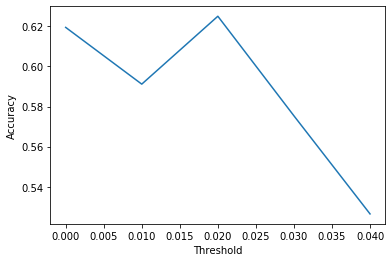

In [320]:
threshold_accuracy_jaccard = pd.DataFrame(
    list(zip(threshold_list, accuracy_list)), columns=["threshold", "accuracy"]
)
plt.plot("threshold", "accuracy", data=threshold_accuracy_jaccard)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

In [321]:
threshold_accuracy_jaccard.loc[threshold_accuracy_jaccard["accuracy"].idxmax()]

threshold    0.020
accuracy     0.625
Name: 2, dtype: float64

The code chunk above tells us that the Jaccard similarity threshold of .012 gives us the best accuracy. 

Note that this may not match the printed value above, as I changed the loop to a shorter run time. The value above was calculated from a longer, more exact loop

In [322]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

for x in X_train:
    u, i = x[0], x[1]
    usersPerItem[i].add(u)
    itemsPerUser[u].add(i)


def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom


def mostSimilar(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = Jaccard(usersPerItem[b], usersPerItem[book])
        similarities.append((sim, book))
    similarities.sort(reverse=True)
    return similarities[:10]


predictions = open("predictions_Read_kaggleq3.txt", "w")
for l in open("pairs_Read.txt"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split("-")
    if mostSimilar(u, b):
        if max(mostSimilar(u, b))[0] > 0.0120:
            predictions.write(u + "-" + b + ",1\n")
        else:
            predictions.write(u + "-" + b + ",0\n")
    else:
        predictions.write(u + "-" + b + ",0\n")
predictions.close()

In [40]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

for x in X_train:
    u, i = x[0], x[1]
    usersPerItem[i].add(u)
    itemsPerUser[u].add(i)

def cosim(set1, set2):
    numer = set1.intersection(set2)
    numer = len(numer)
    denom = len(set1) * len(set2)
    if denom == 0:
        return 0
    else:
        sim = numer / denom
        return(sim)

def mostSimilarCosine(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = cosim(set(usersPerItem[b]), set(usersPerItem[book]))
        similarities.append(sim)
    similarities.sort(reverse=True)
    return(similarities)
    
predictions = open("predictions_Read_question4.txt", "w")
for l in range(len(X_val)):
    u = X_val[l][0]
    b = X_val[l][1]
    if mostSimilarCosine(u, b):
        if b in return1 or mostSimilarCosine(u, b)[0] > 0.005:
            predictions.write(u + "-" + b + ",1\n")
        else:
            predictions.write(u + "-" + b + ",0\n")
    elif b in return1:
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")
predictions.close()

predictions = open("predictions_Read_question4.txt", "r")
predictions_array = []
for l in predictions.readlines():
    l.strip("\n")
    predictions_array = numpy.append(predictions_array, l[20])

y_actual = []
y_actual = numpy.append(y_actual, y_val)
correctPredictions = 0

for x in range(len(predictions_array)):
    if predictions_array[x] == str(int(y_actual[x])):
        correctPredictions += 1

accuracy = correctPredictions / len(predictions_array)
print(f"The accuracy of the Jaccard and popularity baseline model is {accuracy}")

The accuracy of the Jaccard and popularity baseline model is 0.64835


In [ ]:
def cosim(set1, set2):
    numer = set1.intersection(set2)
    numer = len(numer)
    denom = len(set1) * len(set2)
    if denom == 0:
        return 0
    else:
        sim = numer / denom
        return(sim)

def mostSimilarCosine(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = cosim(set(usersPerItem[b]), set(usersPerItem[book]))
        similarities.append(sim)
    similarities.sort(reverse=True)
    return(similarities)
    
accuracy_list = []
threshold_list = []
for threshold_2 in range(100000, 140000, 10000):
    for threshold in numpy.arange(0.02, 0.03, 0.001):
        return1 = defaultdict(list)
        count = 0
        for ic, i in mostPopular:
            count += ic
            return1[i].append(ic)
            if count > threshold_2:
                break

        predictions = open("predictions_Read_question4.txt", "w")
        for l in range(len(X_val)):
            u = X_val[l][0]
            b = X_val[l][1]
            if mostSimilarCosine(u, b) and len(return1[b]) > 0:
                if return1[b][0] * mostSimilarCosine(u, b)[0] > threshold:
                    predictions.write(u + "-" + b + ",1\n")
                else:
                    predictions.write(u + "-" + b + ",0\n")
            else:
                predictions.write(u + "-" + b + ",0\n")
        predictions.close()

        predictions = open("predictions_Read_question4.txt", "r")
        predictions_array = []
        for l in predictions.readlines():
            l.strip("\n")
            predictions_array = numpy.append(predictions_array, l[20])

        y_actual = []
        y_actual = numpy.append(y_actual, y_val)
        correctPredictions = 0

        for x in range(len(predictions_array)):
            if predictions_array[x] == str(int(y_actual[x])):
                correctPredictions += 1

        accuracy = correctPredictions / len(predictions_array)
        print(f"The accuracy of the Jaccard and popularity baseline model is {accuracy}")
        accuracy_list.append(accuracy)
        threshold_list.append((threshold, threshold_2))

In [381]:
bookCount = defaultdict(int)
totalRead = 0

for x in range(len(X)):
    bookCount[X[x][1]] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = defaultdict(list)
count = 0
for ic, i in mostPopular:
    count += ic
    return1[i].append(ic)
    if count > 120000:
        break

combos = defaultdict(dict)
test_list = []
for l in open("pairs_Read.txt"):
    u, b = l.strip().split("-")
    if u == 'userID': continue
    if len(return1[b]) > 0:
        combos[u][b] = mostSimilarCosine(u,b) * return1[b][0]
    else: 
        combos[u][b] = mostSimilarCosine(u,b)
    test_list.append((u, b))

In [382]:
for user in combos:
    combos[user] = dict(sorted(combos[user].items(), key=lambda x:x[1]))

In [ ]:
combos[u]

In [375]:
combos[u]

{'b88617544': 0.0,
 'b18185034': 0.010869565217391304,
 'b57480183': 0.40151515151515155,
 'b49930080': 0.5714285714285714}

In [383]:
predictions = open("predictions_Read_question4.txt", "w")
for l in open("pairs_Read.txt"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split("-")
    if list(combos[u]).index(b) > (len(combos[u]) / 2):
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")
predictions.close()

#### Question 4: Implementing Jaccard and Popularity Threshold

In [323]:
bookCount = defaultdict(int)
totalRead = 0

for user, book in X:
    bookCount[book] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > 120000:
        break

predictions = open("predictions_Read_question4.txt", "w")
for l in range(len(X_val)):
    u = X_val[l][0]
    b = X_val[l][1]
    if mostSimilar(X_val[l][0], X_val[l][1]):
        if b in return1 or max(mostSimilar(X_val[l][0], X_val[l][1]))[0] > 0.0120:
            predictions.write(u + "-" + b + ",1\n")
        else:
            predictions.write(u + "-" + b + ",0\n")
    elif b in return1:
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")
predictions.close()

In [324]:
predictions = open("predictions_Read_question4.txt", "r")
predictions_array = []
for l in predictions.readlines():
    l.strip("\n")
    predictions_array = numpy.append(predictions_array, l[20])

y_actual = []
y_actual = numpy.append(y_actual, y_val)
correctPredictions = 0

for x in range(len(predictions_array)):
    if predictions_array[x] == str(int(y_actual[x])):
        correctPredictions += 1

accuracy = correctPredictions / len(predictions_array)
print(f"The accuracy of the Jaccard and popularity baseline model is {accuracy}")

The accuracy of the Jaccard and popularity baseline model is 0.6312


#### Question 5: Making Predictions 

In [ ]:
bookCount = defaultdict(int)
totalRead = 0

for user, book in X:
    bookCount[book] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()


threshold_popular1_list = []
threshold_jaccard1_list = []
accuracy1_list = []
for threshold_popular1 in range(100000, totalRead, 1000):
    for threshold_jaccard1 in numpy.arange(0.001, 0.01, 0.0010):

        return1 = set()
        count = 0
        for ic, i in mostPopular:
            count += ic
            return1.add(i)
            if count > threshold_popular1:
                break

        predictions = open("predictions_Read_question4.txt", "w")
        for l in range(len(X_val)):
            u = X_val[l][0]
            b = X_val[l][1]
            if mostSimilar(X_val[l][0], X_val[l][1]):
                if (
                    b in return1
                    and max(mostSimilar(X_val[l][0], X_val[l][1]))[0]
                    > threshold_jaccard1
                ):
                    predictions.write(u + "-" + b + ",1\n")
                else:
                    predictions.write(u + "-" + b + ",0\n")
            elif b in return1:
                predictions.write(u + "-" + b + ",1\n")
            else:
                predictions.write(u + "-" + b + ",0\n")
        predictions.close()

        predictions = open("predictions_Read_question4.txt", "r")
        predictions_array = []
        for l in predictions.readlines():
            l.strip("\n")
            predictions_array = numpy.append(predictions_array, l[20])

        y_actual = []
        y_actual = numpy.append(y_actual, y_val)
        correctPredictions = 0

        for x in range(len(predictions_array)):
            if predictions_array[x] == str(int(y_actual[x])):
                correctPredictions += 1

        accuracy = correctPredictions / len(predictions_array)
        threshold_popular1_list.append(threshold_popular1)
        threshold_jaccard1_list.append(threshold_jaccard1)
        accuracy1_list.append(accuracy)

In [ ]:
combo_model_df = pd.DataFrame(
    list(zip(threshold_popular1_list, threshold_jaccard1_list, accuracy1_list)),
    columns=["Popularity Threshold", "Jaccard Threshold", "Accuracy"],
)
combo_model_df.loc[combo_model_df["Accuracy"].idxmax()]

Similar to above, I changed the length of the loop in order to reduce reporducing runtime. The values I chose for my final solution are not represented above

In [ ]:
bookCount = defaultdict(int)
totalRead = 0

for x in range(len(X)):
    bookCount[X[x][1]] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

accuracy_list = []
threshold_popular_list = []
threshold_jaccard_list = []
return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > 132000:
        break

predictions = open("predictions_Read_kaggleq5.txt", "w")
for l in open("pairs_Read.txt"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split("-")
    if mostSimilar(u, b):
        if b in return1 and max(mostSimilar(u, b))[0] > 0.0080:
            predictions.write(u + "-" + b + ",1\n")
        else:
            predictions.write(u + "-" + b + ",0\n")
    elif b in return1:
        predictions.write(u + "-" + b + ",1\n")
    else:
        predictions.write(u + "-" + b + ",0\n")
predictions.close()

### My Kaggle username/display name is "Alexander Ilyin",  I signed up with email "ailyin@ucsd.edu"

My top score was .67783, this was using model with jaccard threshold .00750 and popularity threshold of 120,000

.






# Rating Prediction

### Question 9: Fitting Simple Predictor

In [471]:
import random

from statistics import mean
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

X = []
y = []
itemsPerUser = defaultdict(list)
usersPerItem = defaultdict(list)
user_ratings_train = defaultdict(list)
user_averages_train = defaultdict(dict)
items_ratings_train = defaultdict(list)
items_averages_train = defaultdict(dict)
user_biases = defaultdict(list)
item_biases = defaultdict(list)

for user, book, r in readCSV("train_Interactions.csv.gz"):
    X.extend([[user, book]])
    r = int(r)
    y.append(r)

X_train = X[:190000]
y_train = y[:190000]
X_val = X[190000:200000]
y_val = y[190000:200000]

for x in range(len(X_train)):
    itemsPerUser[X_train[x][0]].append(X_train[x][1])
    usersPerItem[X_train[x][1]].append(X_train[x][0])
    user_ratings_train[X_train[x][0]].append(y_train[x])
    items_ratings_train[X_train[x][1]].append(y_train[x])

for u in user_ratings_train:
    user_averages_train[u] = sum(user_ratings_train[u]) / len(user_ratings_train[u])

for i in items_ratings_train:
    items_averages_train[i] = sum(items_ratings_train[i]) / len(items_ratings_train[i])

global_avg = mean(y_train)

for u in user_averages_train:
    user_biases[u] = user_averages_train[u] - global_avg
for i in items_averages_train:
    item_biases[i] = items_averages_train[i] - global_avg

In [326]:
def pred(a, b, b1):
    return a + b + b1


def MSE(actual: list, pred: list):
    summ = 0
    for x in range(len(actual)):
        summ += (float(actual[x] - pred[x])) ** 2
    summ = summ / len(actual)
    return summ


old_user_bias = defaultdict(list)
old_item_bias = defaultdict(list)
counter = 10
while counter > 0:
    summ = 0
    for x in range(len(X_train)):
        summ += y_train[x] - (user_biases[X_train[x][0]] + item_biases[X_train[x][1]])
    alpha = summ / len(y_train)
    y_pred = []
    for user in itemsPerUser:
        summ_b = 0
        for i in range(len(itemsPerUser[user])):
            summ_b += user_ratings_train[user][i] - (
                alpha + item_biases[itemsPerUser[user][i]]
            )
        beta_u = (summ_b) / (1 + len(user_ratings_train[user]))
        user_bias_new[user] = beta_u
        user_biases[user] = beta_u
    for book in usersPerItem:
        summ_b1 = 0
        for i in range(len(usersPerItem[book])):
            summ_b1 += items_ratings_train[book][i] - (
                alpha + user_biases[usersPerItem[book][i]]
            )
        beta_i = (summ_b1) / (1 + len(items_ratings_train[book]))
        item_bias_new[book] = beta_i
        item_biases[book] = beta_i

    for user, book in X_train:
        prediction = pred(alpha, item_bias_new[book], user_bias_new[user])
        y_pred.append(prediction)
    mse = MSE(y_train, y_pred)
    print(f"The mean squared error on the training set is: {mse}")
    counter = counter - 1

y_pred = []
for user, item in X_val:
    if user_bias_new[user] != [] and item_bias_new[item] != []:
        predictions = pred(alpha, user_bias_new[user], item_bias_new[item])
        y_pred.append(predictions)
    elif user_bias_new[user] == []:
        predictions = pred(alpha, 0, item_bias_new[item])
        y_pred.append(predictions)
    elif item_bias_new[item] == []:
        predictions = pred(alpha, user_bias_new[user], 0)
        y_pred.append(predictions)
mse = MSE(y_val, y_pred)
print(f"The mean squared error on the validation set is: {mse}")

The mean squared error on the training set is: 0.9104160042114058
The mean squared error on the training set is: 0.9049886289218022
The mean squared error on the training set is: 0.9043051229347089
The mean squared error on the training set is: 0.9041225817391052
The mean squared error on the training set is: 0.9040549183196855
The mean squared error on the training set is: 0.904024893265353
The mean squared error on the training set is: 0.9040099508579275
The mean squared error on the training set is: 0.9040018651649269
The mean squared error on the training set is: 0.9039971584267795
The mean squared error on the training set is: 0.9039942058988707
The mean squared error on the validation set is: 1.1158732273490921


### Question 10: Largest and Smallest beta values

In [327]:
import operator

print(
    f"Larget user beta = {max(user_bias_new.items(), key=operator.itemgetter(1))[0]} and smallest user beta = {min(user_bias_new.items(), key=operator.itemgetter(1))[0]}"
)
print(
    f"Largest item beta = {max(item_bias_new.items(), key=operator.itemgetter(1))[0]} and smallest item beta = {min(item_bias_new.items(), key=operator.itemgetter(1))[0]}"
)

Larget user beta = u32162993 and smallest user beta = u48313610
Largest item beta = b19925500 and smallest item beta = b84091840


### Question 11: Finding an optimal lambda

In [328]:
mse_list = []
lambda_list = []

for l in range(1, 5):
    counter = 10
    user_bias_new = defaultdict(list)
    item_bias_new = defaultdict(list)
    old_user_bias = defaultdict(list)
    old_item_bias = defaultdict(list)
    counter = 10
    while counter > 0:
        summ = 0
        for x in range(len(X_train)):
            summ += y_train[x] - (
                user_biases[X_train[x][0]] + item_biases[X_train[x][1]]
            )
        alpha = summ / len(y_train)
        y_pred = []
        for user in itemsPerUser:
            summ_b = 0
            for i in range(len(itemsPerUser[user])):
                summ_b += user_ratings_train[user][i] - (
                    alpha + item_biases[itemsPerUser[user][i]]
                )
            beta_u = (summ_b) / (l + len(user_ratings_train[user]))
            user_bias_new[user] = beta_u
            user_biases[user] = beta_u
        for book in usersPerItem:
            summ_b1 = 0
            for i in range(len(usersPerItem[book])):
                summ_b1 += items_ratings_train[book][i] - (
                    alpha + user_biases[usersPerItem[book][i]]
                )
            beta_i = (summ_b1) / (l + len(items_ratings_train[book]))
            item_bias_new[book] = beta_i
            item_biases[book] = beta_i

        for user, book in X_train:
            prediction = pred(alpha, item_bias_new[book], user_bias_new[user])
            y_pred.append(prediction)
        mse = MSE(y_train, y_pred)
        counter = counter - 1

    y_pred = []
    for user, item in X_val:
        if user_bias_new[user] != [] and item_bias_new[item] != []:
            predictions = pred(alpha, user_bias_new[user], item_bias_new[item])
            y_pred.append(predictions)
        elif user_bias_new[user] == []:
            predictions = pred(alpha, 0, item_bias_new[item])
            y_pred.append(predictions)
        elif item_bias_new[item] == []:
            predictions = pred(alpha, user_bias_new[user], 0)
            y_pred.append(predictions)
    mse = MSE(y_val, y_pred)
    mse_list.append(mse)
    lambda_list.append(l)

([<matplotlib.axis.XTick at 0x7f59ef882128>,
 <a list of 4 Text xticklabel objects>)

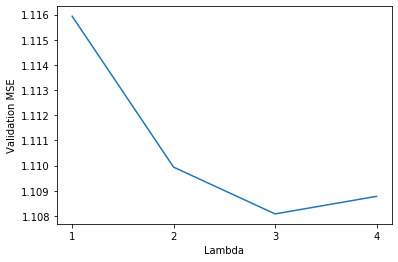

In [332]:
mse_lambda = pd.DataFrame(list(zip(mse_list, lambda_list)), columns=["MSE", "Lambda"])

plt.plot("Lambda", "MSE", data=mse_lambda)
plt.xlabel("Lambda")
plt.ylabel("Validation MSE")
plt.xticks(range(1, 5))

Optimal lambda seems to be 3 in this case

In [398]:
counter = 10
user_bias_new = defaultdict(list)
item_bias_new = defaultdict(list)
old_user_bias = defaultdict(list)
old_item_bias = defaultdict(list)
counter = 10
while counter > 0:
    summ = 0
    for x in range(len(X_train)):
        summ += y_train[x] - (user_biases[X_train[x][0]] + item_biases[X_train[x][1]])
    alpha = summ / len(y_train)
    y_pred = []
    for user in itemsPerUser:
        summ_b = 0
        for i in range(len(itemsPerUser[user])):
            summ_b += user_ratings_train[user][i] - (
                alpha + item_biases[itemsPerUser[user][i]]
            )
        beta_u = (summ_b) / (3 + len(user_ratings_train[user]))
        user_bias_new[user] = beta_u
        user_biases[user] = beta_u
    for book in usersPerItem:
        summ_b1 = 0
        for i in range(len(usersPerItem[book])):
            summ_b1 += items_ratings_train[book][i] - (
                alpha + user_biases[usersPerItem[book][i]]
            )
        beta_i = (summ_b1) / (3 + len(items_ratings_train[book]))
        item_bias_new[book] = beta_i
        item_biases[book] = beta_i

    for user, book in X_train:
        prediction = pred(alpha, item_bias_new[book], user_bias_new[user])
        y_pred.append(prediction)
    mse = MSE(y_train, y_pred)
    counter = counter - 1

predictions = open("predictions_Rating.txt", "w")
for l in open("pairs_Rating.txt"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split("-")
    if user_bias_new[u] != [] and item_bias_new[b] != []:
        predictions.write(u + "-" + b + "," + str(pred(alpha, user_bias_new[u], item_bias_new[b])) + "\n")
    elif user_bias_new[u] == []:
        predictions.write(u + "-" + b + "," + str(pred(alpha, 0, item_bias_new[b])) + "\n")
    elif item_bias_new[b] == []:
        predictions.write(u + "-" + b + "," + str(pred(alpha, user_bias_new[u], 0)) + "\n")
    elif user_bias_new[u] == [] and item_bias_new[b] == []:
        predictions.write(u + "-" + b + "," + str(pred(alpha, 0, 0)) + "\n")

predictions.close()

Another way I thought to imporve this initial model, was to use more of the dataset for training. I tried various models, but settled on using the WHOLE dataset for training, and found that this gave me the best score on Kaggle. 

In [338]:
import random

from statistics import mean
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

X = []
y = []
itemsPerUser = defaultdict(list)
usersPerItem = defaultdict(list)
user_ratings_train = defaultdict(list)
user_averages_train = defaultdict(dict)
items_ratings_train = defaultdict(list)
items_averages_train = defaultdict(dict)
user_biases = defaultdict(list)
item_biases = defaultdict(list)

for user, book, r in readCSV("train_Interactions.csv.gz"):
    X.extend([[user, book]])
    r = int(r)
    y.append(r)

X_train = X[:190000]
y_train = y[:190000]
X_val = X[190000:200000]
y_val = y[190000:200000]

for x in range(len(X)):
    itemsPerUser[X[x][0]].append(X[x][1])
    usersPerItem[X[x][1]].append(X[x][0])
    user_ratings_train[X[x][0]].append(y[x])
    items_ratings_train[X[x][1]].append(y[x])

for u in user_ratings_train:
    user_averages_train[u] = sum(user_ratings_train[u]) / len(user_ratings_train[u])

for i in items_ratings_train:
    items_averages_train[i] = sum(items_ratings_train[i]) / len(items_ratings_train[i])

global_avg = mean(y_train)

for u in user_averages_train:
    user_biases[u] = user_averages_train[u] - global_avg
for i in items_averages_train:
    item_biases[i] = items_averages_train[i] - global_avg

In [339]:
mse_list = []
lambda_list = []

for l in range(1, 8):
    counter = 10
    user_bias_new = defaultdict(list)
    item_bias_new = defaultdict(list)
    old_user_bias = defaultdict(list)
    old_item_bias = defaultdict(list)
    counter = 10
    while counter > 0:
        summ = 0
        for x in range(len(X)):
            summ += y[x] - (user_biases[X[x][0]] + item_biases[X[x][1]])
        alpha = summ / len(y)
        y_pred = []
        for user in itemsPerUser:
            summ_b = 0
            for i in range(len(itemsPerUser[user])):
                summ_b += user_ratings_train[user][i] - (
                    alpha + item_biases[itemsPerUser[user][i]]
                )
            beta_u = (summ_b) / (l + len(user_ratings_train[user]))
            user_bias_new[user] = beta_u
            user_biases[user] = beta_u
        for book in usersPerItem:
            summ_b1 = 0
            for i in range(len(usersPerItem[book])):
                summ_b1 += items_ratings_train[book][i] - (
                    alpha + user_biases[usersPerItem[book][i]]
                )
            beta_i = (summ_b1) / (l + len(items_ratings_train[book]))
            item_bias_new[book] = beta_i
            item_biases[book] = beta_i

        for user, book in X:
            prediction = pred(alpha, item_bias_new[book], user_bias_new[user])
            y_pred.append(prediction)
        mse = MSE(y, y_pred)
        counter = counter - 1

    y_pred = []
    for user, item in X_val:
        if user_bias_new[user] != [] and item_bias_new[item] != []:
            predictions = pred(alpha, user_bias_new[user], item_bias_new[item])
            y_pred.append(predictions)
        elif user_bias_new[user] == []:
            predictions = pred(alpha, 0, item_bias_new[item])
            y_pred.append(predictions)
        elif item_bias_new[item] == []:
            predictions = pred(alpha, user_bias_new[user], 0)
            y_pred.append(predictions)
    mse = MSE(y_val, y_pred)
    print(f"The mean squared error on the validation set is: {mse}")
    mse_list.append(mse)
    lambda_list.append(l)

The mean squared error on the validation set is: 0.9166657051478027
The mean squared error on the validation set is: 0.9230717629220657
The mean squared error on the validation set is: 0.9310654940806214
The mean squared error on the validation set is: 0.9399199754784744
The mean squared error on the validation set is: 0.9492118718702502
The mean squared error on the validation set is: 0.9586781622171168
The mean squared error on the validation set is: 0.9681523142457509


This tells us that the optimal lambda was at 1, so we use the whole dataset as training with lambda=1, and predict...

In [340]:
counter = 10
user_bias_new = defaultdict(list)
item_bias_new = defaultdict(list)
old_user_bias = defaultdict(list)
old_item_bias = defaultdict(list)
counter = 10
while counter > 0:
    summ = 0 
    for x in range(len(X)):
        summ += y[x] - (user_biases[X[x][0]]+item_biases[X[x][1]])
    alpha = summ / len(y)
    y_pred = []     
    for user in itemsPerUser:
        summ_b = 0
        for i in range(len(itemsPerUser[user])):
            summ_b += user_ratings_train[user][i] - (alpha + item_biases[itemsPerUser[user][i]])
        beta_u = (summ_b) / (1+len(user_ratings_train[user]))
        user_bias_new[user] = beta_u
        user_biases[user] = beta_u
    for book in usersPerItem:
        summ_b1 = 0
        for i in range(len(usersPerItem[book])):
            summ_b1 += items_ratings_train[book][i] - (alpha + user_biases[usersPerItem[book][i]])
        beta_i = (summ_b1) / (1+len(items_ratings_train[book]))
        item_bias_new[book] = beta_i 
        item_biases[book] = beta_i

    for user, book in X:
        prediction = pred(alpha, item_bias_new[book], user_bias_new[user])
        y_pred.append(prediction)
    mse = MSE(y, y_pred)
    counter = counter - 1

predictions = open("predictions_Rating.txt", 'w')
for l in open("pairs_Rating.txt"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,b = l.strip().split('-')
    if user_bias_new[u] != [] and item_bias_new[b] != []:
        predictions.write(u + '-' + b + ',' + str(pred(alpha, user_bias_new[u], item_bias_new[b])) + '\n')
    elif user_bias_new[u] == []:
        predictions.write(u + '-' + b + ',' + str(pred(alpha, 0, item_bias_new[b])) + '\n')
    elif item_bias_new[b] == []:
        predictions.write(u + '-' + b + ',' + str(pred(alpha, user_bias_new[u], 0)) + '\n')
    elif user_bias_new[u] == [] and item_bias_new[b] == []:
        predictions.write(u + '-' + b + ',' + str(pred(alpha, 0, 0)) + '\n')

predictions.close()

.

.

.

In [5]:
import pandas as pd
import numpy
import warnings
import gzip
import random
import matplotlib.pyplot as plt

from collections import defaultdict
from math import sqrt

warnings.filterwarnings("ignore")

X = []
y = []
data = pd.read_csv("train_Interactions.csv.gz")
for i in range(len(data)):
    X.extend([[data["userID"][i], data["bookID"][i]]])
    y.append(1)
    
itemsPerUser = defaultdict(list)
usersPerItem = defaultdict(list)
user_ratings = defaultdict(list)
user_book_ratings = defaultdict(list)
user_averages = defaultdict(dict)
items_ratings = defaultdict(list)
items_averages = defaultdict(dict)
all_books = set([x[1] for x in X])


def cosim(set1, set2):
    numer = set1.intersection(set2)
    numer = len(numer)
    denom = len(set1) * len(set2)
    sim = numer / denom
    return(sim)

def mostSimilarCosine(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = cosim(set(usersPerItem[b]), set(usersPerItem[book]))
        similarities.append(sim)
    similarities.sort(reverse=True)
    if similarities[0] == 1.0 and len(similarities) > 1:
        return similarities[1]
    else: 
        return max(similarities)

def distance(set1, set2):
    diff1 = set1.difference(set2)
    diff2 = set2.difference(set1)
    
    distance = len(diff1) + len(diff2)
    return(-distance)

def closest(u, b):
    closest = []
    books = set(itemsPerUser[u])
    for book in books:
        dist = distance(set(usersPerItem[u]), set(usersPerItem[book]))
        closest.append(dist)
    closest.sort(reverse=False)
    return closest[:10]


def Jaccard(s1, s2):
    numer = len(set(s1).intersection(set(s2)))
    denom = len(set(s1).union(set(s2)))
    return numer / denom


def mostSimilar(u, b):
    similarities = []
    books = set(itemsPerUser[u])
    for book in books:
        sim = Jaccard(usersPerItem[b], usersPerItem[book])
        similarities.append(sim)
    similarities.sort(reverse=True)
    if similarities[0] == 1.0 and len(similarities) > 1:
        return similarities[1]
    else:
        return max(similarities)

for x in range(len(X)):
    itemsPerUser[X[x][0]].append(X[x][1])
    usersPerItem[X[x][1]].append(X[x][0])
    user_book_ratings[X[x][0], X[x][1]].append(int(y[x]))
    user_ratings[X[x][0]].append(int(y[x]))
    items_ratings[X[x][1], X[x][1]].append(int(y[x]))
    
bookCount = defaultdict(int)
totalRead = 0

for x in range(len(X)):
    bookCount[X[x][1]] += 1
    totalRead += 1
    
mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

In [6]:
X_train = X[:190000]
y_train = y[:190000]
X_val = X[190000:200000]
y_val = y[190000:200000] 

similarities_list = []
count_list = []

for x in range(190000):
    user = X_train[x][0]
    unread_books = list(all_books.difference(itemsPerUser[user]))
    choice = unread_books[random.randint(0, len(unread_books) - 1)]
    X.extend([[X_train[x][0], choice]])
    y.append(0)
    
for x in range(10000):
    user = X_val[x][0]
    unread_books = list(all_books.difference(itemsPerUser[user]))
    choice = unread_books[random.randint(0, len(unread_books) - 1)]
    X.extend([[X_val[x][0], choice]])
    y.append(0)

for x in range(len(X)):
    similarities_list.extend([[1, bookCount[X[x][1]], mostSimilar(X[x][0], X[x][1]), 
                               mostSimilarCosine(X[x][0], X[x][1])]])


In [ ]:
similarities_list

In [8]:
joined_list = []
for x in range(len(X)):
    joined_list.append((X[x][0], X[x][1], y[x], similarities_list[x][0], similarities_list[x][1], similarities_list[x][2], similarities_list[x][3]))
    
similarities_df = pd.DataFrame.from_records(joined_list, columns = ['User', 'Book', 'Read', 'Offset', 'Popularity', 'maxJaccard', 'maxCosine'])

random.shuffle(joined_list)

X_train = []
X_val = []
y_train = []
y_val = []

for x in range(380000):
    X_train.append((joined_list[x][3], joined_list[x][4], joined_list[x][5], joined_list[x][6]))
    y_train.append(joined_list[x][2])
    
for x in range(380000, 400000):
    X_val.append((joined_list[x][3], joined_list[x][4], joined_list[x][5], joined_list[x][6]))
    y_val.append(joined_list[x][2])

In [9]:
len(X_train)

380000

In [10]:
from sklearn.linear_model import LogisticRegression

def find_ber(predictions: list, y: list):
    true_positive = 0
    false_negative = 0
    true_negative = 0
    false_positive = 0
    balanced_error_rate = 0
    for i in range(len(predictions)):
        if predictions[i] == True and y[i] == True:
            true_positive = true_positive + 1
    for i in range(len(predictions)):
        if predictions[i] == False and y[i] == True:
            false_negative = false_negative + 1
    t_p_r = true_positive / (true_positive + false_negative)

    for i in range(len(predictions)):
        if predictions[i] == False and y[i] == False:
            true_negative = true_negative + 1
    for i in range(len(predictions)):
        if predictions[i] == True and y[i] == False:
            false_positive = false_positive + 1
    t_n_r = true_negative / (true_negative + false_positive)
    balanced_error_rate = 1 - (0.5 * (t_p_r + t_n_r))

    return balanced_error_rate

reg = LogisticRegression(C=1.0)
reg.fit(X_train, y_train)
pred = reg.predict(X_val)

print(find_ber(pred, y_val))
correctPredictions = pred == y_val
accuracy_test = sum(correctPredictions) / len(correctPredictions)

0.012252450490098044


In [11]:
accuracy_test

0.98775

In [1158]:
accuracy_list = []
lambda_list = []
for l in numpy.arange(.1, 10, .5):
    reg = LogisticRegression(C=l)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_val)
    
    correctPredictions = pred == y_val
    accuracy_val = sum(correctPredictions) / len(correctPredictions)
    
    accuracy_list.append(accuracy_val)
    lambda_list.append(l)

In [1159]:
accuracy_list

[0.9736,
 0.9836,
 0.9859333333333333,
 0.9876666666666667,
 0.9884,
 0.9892,
 0.9849666666666667,
 0.985,
 0.9850666666666666,
 0.9851666666666666,
 0.9850666666666666,
 0.9851,
 0.9851666666666666,
 0.9851666666666666,
 0.9852,
 0.9929666666666667,
 0.9929666666666667,
 0.9930333333333333,
 0.9932333333333333,
 0.9933666666666666]

In [1162]:
pred_features = []
test_list = []
for l in open("pairs_Read.txt"):
    u, b = l.strip().split("-")
    if u == 'userID': continue
    test_list.append((u, b))
    pred_features.append((1, bookCount[b], mostSimilar(u, b), 
                               mostSimilarCosine(u, b)))

In [1163]:
reg = LogisticRegression(C=10)
reg.fit(X_train, y_train)
kaggle_pred = reg.predict(pred_features)
made_predictions = defaultdict(list)
predictions = open("predictions_Read_postdue.txt", "w")
predictions.write('userID' + "-" + 'bookID,prediction' + '\n')
for x in range(0, len(test_list)):
    if sum(made_predictions[test_list[x][0]]) == 0:
        predictions.write(test_list[x][0] + "-" + test_list[x][1] + ',' + "1" + "\n")
        made_predictions[test_list[x][0]].append(1)
    elif sum(made_predictions[test_list[x][0]]) > 1:
        predictions.write(test_list[x][0] + "-" + test_list[x][1] + ',' + "0" + "\n")
        made_predictions[test_list[x][0]].append(0)
    else:
        predictions.write(test_list[x][0] + "-" + test_list[x][1] + ',' + str(kaggle_pred[x]) + "\n")
        made_predictions[test_list[x][0]].append(kaggle_pred[x])
predictions.close()

In [1164]:
kaggle_pred = reg.predict(pred_features)
predictions = open("predictions_Read_postdue.txt", "w")
predictions.write('userID' + "-" + 'bookID,prediction' + '\n')
for x in range(len(test_list)):
    predictions.write(test_list[x][0] + "-" + test_list[x][1] + ',' + str(kaggle_pred[x]) + "\n")
predictions.close()

In [784]:
200000/210000

0.9523809523809523

In [805]:
150/250

0.6

In [885]:
.6 * 400000

240000.0

In [886]:
len(X)

400000

In [918]:
import scipy.optimize
import numpy as np

X = []
y = []
itemsPerUser = defaultdict(list)
usersPerItem = defaultdict(list)
user_ratings = defaultdict(list)
user_averages = defaultdict(dict)
items_ratings = defaultdict(list)
items_averages = defaultdict(dict)
user_biases = defaultdict(list)
item_biases = defaultdict(list)
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

for user, book, r in readCSV("train_Interactions.csv.gz"):
    X.extend([[user, book]])
    r = int(r)
    y.append(r)

X_train = X[:190000]
y_train = y[:190000]
X_val = X[190000:200000]
y_val = y[190000:200000]

for x in range(len(X)):
    itemsPerUser[X[x][0]].append(X[x][1])
    usersPerItem[X[x][1]].append(X[x][0])
    user_ratings[X[x][0]].append(y[x])
    items_ratings[X[x][1]].append(y[x])

for u in user_ratings:
    user_averages[u] = sum(user_ratings[u]) / len(user_ratings[u])

for i in items_ratings:
    items_averages[i] = sum(items_ratings[i]) / len(items_ratings[i])

global_avg = mean(y_train)
alpha = global_avg
    
for x in range(len(X)):
    user, item, rating = X[x][0], X[x][1], y[x]
    reviewsPerUser[user].append((item, rating))
    reviewsPerItem[item].append((item, rating))

N = len(X)
nUsers = len(reviewsPerUser)
nItems = len(reviewsPerItem)
users = list(reviewsPerUser.keys())
items = list(reviewsPerItem.keys())

In [931]:
userGamma = {}
itemGamma = {}

K = 2 

for u in reviewsPerUser:
    userGamma[u] = [random.random() * 0.1 - 0.05 for k in range(K)]
    
for i in reviewsPerItem:
    itemGamma[i] = [random.random() * 0.1 - 0.05 for k in range(K)]
    
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    global userGamma
    global itemGamma
    index = 0
    alpha = theta[index]
    index += 1
    userBiases = dict(zip(users, theta[index:index+nUsers]))
    index += nUsers
    itemBiases = dict(zip(items, theta[index:index+nItems]))
    index += nItems
    for u in users:
        userGamma[u] = theta[index:index+K]
        index += K
    for i in items:
        itemGamma[i] = theta[index:index+K]
        index += K

def MSE_new(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item] + np.inner(userGamma[user], itemGamma[item])

def cost(theta, labels, lamb):
    unpack(theta)
    predictions = [prediction(X[x][0], X[x][1]) for x in range(len(X))]
    cost = MSE_new(predictions, labels)
    print("MSE = " + str(cost))
    for u in users:
        cost += lamb*userBiases[u]**2
        for k in range(K):
            cost += lamb*userGamma[u][k]**2
    for i in items:
        cost += lamb*itemBiases[i]**2
        for k in range(K):
            cost += lamb*itemGamma[i][k]**2
    return cost

def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(X)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    dUserGamma = {}
    dItemGamma = {}
    for u in reviewsPerUser:
        dUserGamma[u] = [0.0 for k in range(K)]
    for i in reviewsPerItem:
        dItemGamma[i] = [0.0 for k in range(K)]
    for x in range(len(X)):
        u, i = X[x][0], X[x][1]
        pred = prediction(u, i)
        diff = pred - y[x]
        dalpha += 2/N * diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[i] += 2/N*diff
        for k in range(K):
            dUserGamma[u][k] += 2/N*itemGamma[i][k]*diff
            dItemGamma[i][k] += 2/N*userGamma[u][k]*diff
        for u in userBiases:
            dUserBiases[u] += 2*lamb*userBiases[u]
        for k in range(K):
            dUserGamma[u][k] += 2*lamb*userGamma[u][k]
    for i in itemBiases:
        dItemBiases[i] += 2*lamb*itemBiases[i]
        for k in range(K):
            dItemGamma[i][k] += 2*lamb*itemGamma[i][k]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    for u in users:
        dtheta += dUserGamma[u]
    for i in items:
        dtheta += dItemGamma[i]
    return numpy.array(dtheta)

In [935]:
scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems) + [random.random() * 0.1 - 0.05 for k in range(K*(nUsers+nItems))],
                             derivative, args = (y, 0.001))


MSE = 1.4744191177285175


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [934]:
theta

NameError: name 'theta' is not defined